# Compute heavy fractions

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import binom
import seaborn as sns

In [2]:
input_data_path = Path('00_input_data')
mid_data_path = Path('01_mid_data')
results_path = Path('02_heavy_fractions_concentrations')

In [3]:
def _index_levels_to_int(df: pd.DataFrame, levels: list, axis: int) -> None:
    for level in levels:
        df.rename(int, level=level, axis=axis, inplace=True)

In [4]:
def import_mids(file_name: Path) -> pd.DataFrame:
    mids = pd.read_csv(file_name, header=[0, 1], index_col=[0, 1, 2, 3, 4])
    _index_levels_to_int(mids, [2, 3, 4], axis=0)
    _index_levels_to_int(mids, [1], axis=1)
    return mids.sort_index()

In [5]:
# move to simpleflux package
def binomial_mid(n: int, p_heavy = 0.0107) -> np.array:
    return np.array([binom.pmf(k, n, p_heavy) for k in range(n+1)])

In [6]:
plt.rcParams['pdf.use14corefonts'] = True

## Import MID data
We use only cell extract without standards, and only well-measured metabolites

### U-13C-methionine tracing

In [7]:
met_mids = import_mids(mid_data_path / 'U13C-met_mids.csv')
met_mids.head(5)

metabolite                                                hcys     cyst       \
mi                                                           0   4    0    4   
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             NaN NaN  1.0  0.0   
                                             2             NaN NaN  1.0  0.0   
                 15           0              1             NaN NaN  1.0  0.0   
                                             2             NaN NaN  1.0  0.0   
                 30           0              1             NaN NaN  1.0  0.0   

metabolite                                                 cys       met  \
mi                                                           0         0   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1             1.0  0.049983   
                                             2             1.0  0.039748   
                 15           0              1             1.0  0.025675   
                                             2             1.0  0.028325   
                 30           0              1             1.0  0.027776   

metabolite                                                                     \
mi                                                                4         5   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.038196  0.911821   
                                             2             0.037279  0.922972   
                 15           0              1             0.039879  0.934446   
                                             2             0.042716  0.928959   
                 30           0              1             0.043632  0.928592   

metabolite                                                      sam            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.869159  0.000000   
                                             2             0.843118  0.000000   
                 15           0              1             0.510197  0.019301   
                                             2             0.504703  0.021287   
                 30           0              1             0.252247  0.033658   

metabolite                                                           sah       
mi                                                                5    0    4  
matrix cell_type time_minutes with_standards replicate_nr                      
Cells  BJ-RAS    5            0              1             0.130841  1.0  0.0  
                                             2             0.156882  1.0  0.0  
                 15           0              1             0.470503  0.0  1.0  
                                             2             0.474010  0.0  1.0  
                 30           0              1             0.714094  0.0  1.0

### D4-homocysteine tracing

In [8]:
hcys_mids = import_mids(mid_data_path / 'D4-hcys_mids.csv')
hcys_mids.head(5)

metabolite                                                     hcys            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.025623  0.974377   
                                             2             0.022464  0.977536   
                 15           0              1             0.022170  0.977830   
                                             2             0.015744  0.984256   
                 30           0              1             0.026149  0.973851   

metabolite                                                     cyst            \
mi                                                                0         4   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             1.000000  0.000000   
                                             2             1.000000  0.000000   
                 15           0              1             1.000000  0.000000   
                                             2             1.000000  0.000000   
                 30           0              1             0.966616  0.033384   

metabolite                                                 cys       met  \
mi                                                           0         0   
matrix cell_type time_minutes with_standards replicate_nr                  
Cells  BJ-RAS    5            0              1             1.0  0.834521   
                                             2             1.0  0.807320   
                 15           0              1             1.0  0.835220   
                                             2             1.0  0.812176   
                 30           0              1             1.0  0.862720   

metabolite                                                                sam  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.165479  0.938673   
                                             2             0.192680  0.939687   
                 15           0              1             0.164780  0.893253   
                                             2             0.187824  0.878791   
                 30           0              1             0.137280  0.800938   

metabolite                                                                sah  \
mi                                                                4         0   
matrix cell_type time_minutes with_standards replicate_nr                       
Cells  BJ-RAS    5            0              1             0.061327  0.906442   
                                             2             0.060313  0.898653   
                 15           0              1             0.106747  0.850411   
                                             2             0.121209  0.828471   
                 30           0              1             0.199062  0.769718   

metabolite                                                           
mi                                                                4  
matrix cell_type time_minutes with_standards replicate_nr            
Cells  BJ-RAS    5            0              1             0.093558  
                                             2             0.101347  
                 15           0              1             0.149589  
                                             2             0.171529  
                 30           0              1             0.230282

## Estimate tracer purity

The expected tracer MID is $Bin(n, p_t)$ where $p_t$ is the purity. For the $n$'th MI the expected isotopomer fraction is $x_n = p_t^n$, so a simple estimate the tracer purity is $p_t = (x_n)^{1/n}$ 

### U-13C-methionine tracing

In [9]:
met_fresh_medium_mi_fractions = met_mids.loc[('Medium', 'none', 0, 0)]['met'].iloc[0]
met_fresh_medium_mi_fractions

mi
0    0.000996
4    0.037897
5    0.961107
Name: 1, dtype: float64

In [10]:
met_tracer_purity = np.power(met_fresh_medium_mi_fractions.loc[5], 1/5)
met_tracer_purity

0.9920975111953164

Check residuals

In [11]:
met_expected_mid = [
    binom.pmf(mi, 5, met_tracer_purity)
    for mi in met_fresh_medium_mi_fractions.index
]
met_fresh_medium_mi_fractions - met_expected_mid

mi
0    9.957899e-04
4   -3.811084e-04
5   -2.220446e-16
Name: 1, dtype: float64

### D4-homocysteine tracing

In [12]:
hcys_fresh_medium_mi_fractions = hcys_mids.loc[('Medium', 'none', 0, 0)]['hcys'].iloc[0]
hcys_fresh_medium_mi_fractions

mi
0    0.0013
4    0.9987
Name: 1, dtype: float64

In [13]:
hcys_tracer_purity = np.power(hcys_fresh_medium_mi_fractions.loc[4], 1/4)
hcys_tracer_purity

0.9996748734645691

Check residuals

In [14]:
hcys_expected_mid = [
    binom.pmf(mi, 4, hcys_tracer_purity)
    for mi in hcys_fresh_medium_mi_fractions.index
]
hcys_fresh_medium_mi_fractions - hcys_expected_mid

mi
0    0.0013
4    0.0000
Name: 1, dtype: float64

## Mixture model

We have a mixture model
$$y = x_0 y^0 + x_1 y^1$$
where $y$ the observed MID, $y^0$ is the natural MID and $y^1$ is the tracer MID. Solve for coefficients $x$ such that $x_0 + x_1 = 1$. Since we do not measure all mass isotopomers of $y$, we can only determine the measured components up to an unknown scale factor, $c$ so that we observe $y' = c y$. Multiplying the above with $c$,
$$y' = c y = c x_0 y^0 + c x_1 y^1$$
Fitting this model to data yields the coefficients $x' = c x$. To recover the fractions $x$, we normalize $x$ to sum to 1.

For larger metabolites that contain the tracer as a moiety (e.g. SAM) the distribution $y^1$ is a convolution between the tracer distribution and the natural distribution over the remaining carbons.

In [15]:
def convolution_matrix(x_mid: np.array, n_y: int) -> np.array:
        n_x = len(x_mid) - 1
        n_conv = n_x + n_y
        conv_mat = np.zeros(shape=[n_conv + 1, n_y + 1])
        for i in range(n_y + 1):
            conv_mat[i:(i + n_x + 1), i] = x_mid
        return conv_mat

In [16]:
def convolute(x_mid: np.array, y_mid: np.array) -> np.array:
    n_y = len(y_mid) - 1
    return convolution_matrix(x_mid, n_y) @ y_mid

In [17]:
def heavy_mid(n: int, n_tracer: int, tracer_purity: float) -> np.array:
    if n > n_tracer:
        return convolute(binomial_mid(n_tracer, tracer_purity), binomial_mid(n - n_tracer))
    else:
        return binomial_mid(n_tracer, tracer_purity)

In matrix form, the system to solve is
$$ (y^0 \ y^1) cx = cy $$
where $y, y^0, y^1$ contain the observed MIs only.

In [18]:
def estimate_heavy_fraction(mids: np.array, n_carbons: int, n_tracer_carbons: int, measured_mi: list, tracer_purity: float) -> np.array:
    if n_tracer_carbons == 0:
        return np.zeros(len(mids))
    mixture_basis = np.array([
        binomial_mid(n_carbons)[measured_mi],
        heavy_mid(n_carbons, n_tracer_carbons, tracer_purity)[measured_mi]
    ]).T
    rhs = mids.T
    coeff, _, _, _ = np.linalg.lstsq(mixture_basis, rhs, rcond=-1)
    return coeff[1] / np.clip(coeff.sum(axis=0), 1e-6, 1e+6)

In [19]:
def estimate_heavy_fraction_pd(mids: pd.DataFrame, n_carbons: int, n_tracer_carbons: int, tracer_purity: float) -> pd.Series:
    measured_mi = mids.columns.get_level_values('mi')
    return pd.Series(
        estimate_heavy_fraction(
            mids, n_carbons, n_tracer_carbons, measured_mi, tracer_purity),
        index=mids.index
    )

## Estimate heavy fractions

In [20]:
n_carbons = {'cys': 3, 'cyst': 7, 'hcys': 4, 'met': 5, 'sah': 14, 'sam': 15}
met_n_tracer_carbons = {'cys': 0, 'cyst': 4, 'hcys': 4, 'met': 5, 'sah': 4, 'sam': 5}
hcys_n_tracer_carbons = {'cys': 0, 'cyst': 4, 'hcys': 4, 'met': 4, 'sah': 4, 'sam': 4}

### U-13C-methioine tracing

In [21]:
met_metabolites_to_use = ['cyst', 'met', 'sam']
met_mids_to_use = met_mids.loc['Cells'].xs(0, level='with_standards')[met_metabolites_to_use]
met_mids_to_use.head(5)

metabolite                          cyst            met                      \
mi                                     0    4         0         4         5   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1             1.0  0.0  0.049983  0.038196  0.911821   
                       2             1.0  0.0  0.039748  0.037279  0.922972   
          15           1             1.0  0.0  0.025675  0.039879  0.934446   
                       2             1.0  0.0  0.028325  0.042716  0.928959   
          30           1             1.0  0.0  0.027776  0.043632  0.928592   

metabolite                                sam                      
mi                                          0         4         5  
cell_type time_minutes replicate_nr                                
BJ-RAS    5            1             0.869159  0.000000  0.130841  
                       2             0.843118  0.000000  0.156882  
          15           1             0.510197  0.019301  0.470503  
                       2             0.504703  0.021287  0.474010  
          30           1             0.252247  0.033658  0.714094

In [22]:
met_heavy_fractions = pd.DataFrame(
    {
        metabolite: estimate_heavy_fraction_pd(
            met_mids_to_use[metabolite],
            n_carbons=n_carbons[metabolite],
            n_tracer_carbons=met_n_tracer_carbons[metabolite],
            tracer_purity=met_tracer_purity
        )
        for metabolite in met_metabolites_to_use
    },
    index=met_mids_to_use.index
)
met_heavy_fractions.head(5)

cyst       met       sam
cell_type time_minutes replicate_nr                                  
BJ-RAS    5            1            -4.730827e-07  0.947336  0.128583
                       2            -4.730827e-07  0.958151  0.154254
          15           1            -4.730827e-07  0.972891  0.475179
                       2            -4.730827e-07  0.970010  0.479771
          30           1            -4.730827e-07  0.970564  0.735455

In [23]:
met_heavy_fractions.to_csv(results_path / '13C-met_heavy_fractions.csv')

### D4-homocysteine tracing

In [24]:
hcys_metabolites_to_use = ['cyst', 'hcys', 'met', 'sah', 'sam']
hcys_mids_to_use = hcys_mids.loc['Cells'].xs(0, level='with_standards')[hcys_metabolites_to_use]
hcys_mids_to_use.head(5)

metabolite                               cyst                hcys            \
mi                                          0         4         0         4   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1             1.000000  0.000000  0.025623  0.974377   
                       2             1.000000  0.000000  0.022464  0.977536   
          15           1             1.000000  0.000000  0.022170  0.977830   
                       2             1.000000  0.000000  0.015744  0.984256   
          30           1             0.966616  0.033384  0.026149  0.973851   

metabolite                                met                 sah            \
mi                                          0         4         0         4   
cell_type time_minutes replicate_nr                                           
BJ-RAS    5            1             0.834521  0.165479  0.906442  0.093558   
                       2             0.807320  0.192680  0.898653  0.101347   
          15           1             0.835220  0.164780  0.850411  0.149589   
                       2             0.812176  0.187824  0.828471  0.171529   
          30           1             0.862720  0.137280  0.769718  0.230282   

metabolite                                sam            
mi                                          0         4  
cell_type time_minutes replicate_nr                      
BJ-RAS    5            1             0.938673  0.061327  
                       2             0.939687  0.060313  
          15           1             0.893253  0.106747  
                       2             0.878791  0.121209  
          30           1             0.800938  0.199062

In [25]:
hcys_heavy_fractions = pd.DataFrame(
    {
        metabolite: estimate_heavy_fraction_pd(
            hcys_mids_to_use[metabolite],
            n_carbons=n_carbons[metabolite],
            n_tracer_carbons=hcys_n_tracer_carbons[metabolite],
            tracer_purity=hcys_tracer_purity
        )
        for metabolite in hcys_metabolites_to_use
    },
    index=hcys_mids_to_use.index
)
hcys_heavy_fractions

cyst      hcys       met  \
cell_type time_minutes replicate_nr                                     
BJ-RAS    5            1            -4.593566e-07  0.973315  0.159794   
                       2            -4.593566e-07  0.976601  0.186270   
          15           1            -4.593566e-07  0.976907  0.159115   
                       2            -4.593566e-07  0.983596  0.181539   
          30           1             3.206148e-02  0.972768  0.132411   
                       2             1.740887e-02  0.976848  0.156405   
          60           1             5.102135e-02  0.964485  0.230089   
                       2             5.314853e-02  0.968196  0.198892   
          300          1             4.291194e-01  0.963461  0.403578   
                       2             4.404467e-01  0.970300  0.501229   
          1440         1             8.303592e-01  1.000000  0.599460   
                       2             8.251840e-01  1.000000  0.586667   
BJ-TERT   5            1            -4.593566e-07  0.967441  0.094399   
                       2            -4.593566e-07  0.965242  0.164493   
          15           1            -4.593566e-07  0.966605  0.123148   
                       2            -4.593566e-07  1.000000  0.094606   
          30           1             1.425645e-02  0.975912  0.112947   
                       2             1.177419e-02  0.977433  0.140444   
          60           1             3.194046e-02  0.967212  0.115458   
                       2             3.125926e-02  0.961743  0.113577   
          300          1             3.413658e-01  1.000000  0.328670   
                       2             3.794063e-01  1.000000  0.274610   
          1440         1             8.983691e-01  1.000000  0.361051   
                       2             8.972190e-01  1.000000  0.359973   

                                          sah       sam  
cell_type time_minutes replicate_nr                      
BJ-RAS    5            1             0.090056  0.058944  
                       2             0.097586  0.057966  
          15           1             0.144331  0.102804  
                       2             0.165651  0.116804  
          30           1             0.222937  0.192457  
                       2             0.291220  0.213659  
          60           1             0.338568  0.320273  
                       2             0.386517  0.316930  
          300          1             0.558061  0.520881  
                       2             0.531719  0.533290  
          1440         1             0.718014  0.670520  
                       2             0.722595  0.641646  
BJ-TERT   5            1             0.096025  0.090070  
                       2             0.125807  0.088091  
          15           1             0.213681  0.182286  
                       2             0.229588  0.157434  
          30           1             0.345977  0.208646  
                       2             0.353136  0.199831  
          60           1             0.444748  0.251716  
                       2             0.479466  0.296056  
          300          1             0.629038  0.408706  
                       2             0.659595  0.415915  
          1440         1             0.642901  0.504933  
                       2             0.634632  0.519912

In [26]:
hcys_heavy_fractions.to_csv(results_path / 'D4-hcys_heavy_fractions.csv')

## Estimate concentrations

Here we use the isotope dilution method to estimate concentration. As the natural MI fraction is virtually zero, the concentration estimate is
$$c = c_\text{std} * \frac{x_\text{mix}}{x_\text{sample} - x_\text{mix}} $$
We here use the effective standard concentration in cell extracts and media, respectively. To obtain cytosolic concentrations from cell extract values, we must multiply by the dilution factor.

In [27]:
# pd.set_eng_float_format(accuracy=2)
pd.set_option('display.float_format', '{:.3E}'.format)

In [28]:
# cell volume and number were measured by the "Scepter" handheld coulter counter
cell_dilution = pd.DataFrame(
    {
        'cell_type': ['BJ-TERT', 'BJ-RAS'],
        'cell_volume': [2.03e-12, 2.54e-12],
        'cell_number': [380_000, 314_000]
    },
).set_index('cell_type')
cell_dilution['total_cell_volume'] = cell_dilution['cell_volume'] * cell_dilution['cell_number']

extract_volume = 1e-3
cell_dilution['dilution_factor'] = extract_volume / cell_dilution['total_cell_volume']
cell_dilution

,cell_volume,cell_number,total_cell_volume,dilution_factor
cell_type,,,,
BJ-TERT,2.030E-12,380000,7.714E-07,1.296E+03
BJ-RAS,2.540E-12,314000,7.976E-07,1.254E+03


### U-13C methionine tracing

In [29]:
# known standard concentrations, for cell extracts and media
met_std_concentrations = pd.read_csv(
    input_data_path / 'U13C-met_standard_concentrations.csv',
    sep=';', index_col=[0,1]
)
met_std_concentrations

concentration_m
matrix metabolite                 
Cells  hcys              9.000E-09
       met               3.600E-07
       cyst              9.000E-08
       sam               9.000E-09
       sah               9.000E-09
Medium met               1.000E-04
       hcys              1.000E-05

In [30]:
# select samples that have internal standards added
met_samples_std = met_mids.xs(1, level='with_standards', drop_level=False).index.remove_unused_levels()
met_samples_no_std = met_samples_std.set_levels([0], level='with_standards')

met_mids_for_estimation = pd.concat(
    [
        met_mids.loc[met_samples_std],
        met_mids.loc[met_samples_no_std]
    ]
).droplevel('time_minutes').sort_index()
met_mids_for_estimation

metabolite                                        hcys                cyst  \
mi                                                   0         4         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1                  NaN       NaN 1.949E-01   
                                2                  NaN       NaN 2.449E-01   
                 1              1            1.000E+00 0.000E+00 9.548E-01   
                                2            1.000E+00 0.000E+00 9.561E-01   
       BJ-TERT   0              1                  NaN       NaN 2.627E-01   
                                2                  NaN       NaN 2.502E-01   
                 1              1            1.000E+00 0.000E+00 9.259E-01   
                                2            1.000E+00 0.000E+00 9.192E-01   
Medium BJ-RAS    0              1            1.012E-01 8.988E-01 1.000E+00   
                                2            1.312E-01 8.688E-01 1.000E+00   
                 1              1            8.772E-01 1.228E-01 1.000E+00   
                                2            8.773E-01 1.227E-01 1.000E+00   
       BJ-TERT   0              2            2.035E-01 7.965E-01 7.744E-01   
                 1              2            8.826E-01 1.174E-01 7.825E-01   
       none      0              1            0.000E+00 1.000E+00 1.000E+00   
                 1              1            9.665E-01 3.347E-02 1.000E+00   

metabolite                                                   cys       met  \
mi                                                   4         0         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            8.051E-01 1.000E+00 2.342E-02   
                                2            7.551E-01 1.000E+00 2.133E-02   
                 1              1            4.520E-02 1.000E+00 5.250E-01   
                                2            4.386E-02 1.000E+00 4.891E-01   
       BJ-TERT   0              1            7.373E-01 1.000E+00 2.364E-02   
                                2            7.498E-01 1.000E+00 2.626E-02   
                 1              1            7.411E-02 1.000E+00 4.439E-01   
                                2            8.079E-02 1.000E+00 4.474E-01   
Medium BJ-RAS    0              1            0.000E+00 1.000E+00 2.031E-02   
                                2            0.000E+00 1.000E+00 2.083E-02   
                 1              1            0.000E+00 1.000E+00 4.903E-01   
                                2            0.000E+00 1.000E+00 4.865E-01   
       BJ-TERT   0              2            2.256E-01 1.000E+00 2.417E-02   
                 1              2            2.175E-01 1.000E+00 4.618E-01   
       none      0              1            0.000E+00 1.000E+00 1.063E-03   
                 1              1            0.000E+00 1.000E+00 4.594E-01   

metabolite                                                             sam  \
mi                                                   4         5         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            4.568E-02 9.309E-01 2.526E-02   
                                2            4.189E-02 9.368E-01 2.400E-02   
                 1              1            2.325E-02 4.518E-01 1.076E-01   
                                2            2.167E-02 4.893E-01 1.024E-01   
       BJ-TERT   0              1            4.494E-02 9.314E-01 2.506E-02   
                                2            4.464E-02 9.291E-01 2.284E-02   
                 1              1            2.527E-02 5.308E-01 1.693E-01   
                                2            2.605E-02 5.265E-01 1.854E-01   
Medium BJ-RAS    0              1            4.363E-02 9.361E-01 0.000E+00   
                                2            4.347E-02 9.357E-01 0.000E+00   
                 1  

In [31]:
# reshape and take highest MI only,
# add standard concentration column
met_conc_estimation = met_mids_for_estimation\
    .T.groupby(level='metabolite').tail(1).T\
    .melt(ignore_index=False)\
    .reset_index().set_index(['metabolite', 'matrix', 'cell_type', 'replicate_nr'])\
    .pivot(columns='with_standards', values='value')\
    .rename({0: 'sample', 1: 'mix'}, axis=1)\
    .join(
        met_std_concentrations.rename({'concentration_m': 'std_conc_m'}, axis=1),
        how='inner'
    )
# estimate concentrations
met_conc_estimation['est_conc_m'] = (
    met_conc_estimation['std_conc_m'] * met_conc_estimation['mix'] / 
    (met_conc_estimation['sample'] - met_conc_estimation['mix'])
)

Medium

In [32]:
met_conc_estimation.xs('Medium', level='matrix')

sample       mix  std_conc_m  est_conc_m
metabolite cell_type replicate_nr                                            
hcys       BJ-RAS    1            8.988E-01 1.228E-01   1.000E-05   1.582E-06
                     2            8.688E-01 1.227E-01   1.000E-05   1.644E-06
           BJ-TERT   2            7.965E-01 1.174E-01   1.000E-05   1.729E-06
           none      1            1.000E+00 3.347E-02   1.000E-05   3.463E-07
met        BJ-RAS    1            9.361E-01 4.876E-01   1.000E-04   1.087E-04
                     2            9.357E-01 4.907E-01   1.000E-04   1.103E-04
           BJ-TERT   2            9.370E-01 5.149E-01   1.000E-04   1.220E-04
           none      1            9.602E-01 5.203E-01   1.000E-04   1.183E-04

For cells, we must take dilution into account

In [33]:
met_cell_concentration = met_conc_estimation.xs('Cells', level='matrix')\
    .join(cell_dilution['dilution_factor'])
met_cell_concentration['cell_conc'] = met_cell_concentration['est_conc_m'] * met_cell_concentration['dilution_factor']
met_cell_concentration

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
cyst       BJ-RAS    1            8.051E-01 4.520E-02   9.000E-08   5.353E-09   
                     2            7.551E-01 4.386E-02   9.000E-08   5.550E-09   
           BJ-TERT   1            7.373E-01 7.411E-02   9.000E-08   1.006E-08   
                     2            7.498E-01 8.079E-02   9.000E-08   1.087E-08   
hcys       BJ-RAS    1                  NaN 0.000E+00   9.000E-09         NaN   
                     2                  NaN 0.000E+00   9.000E-09         NaN   
           BJ-TERT   1                  NaN 0.000E+00   9.000E-09         NaN   
                     2                  NaN 0.000E+00   9.000E-09         NaN   
met        BJ-RAS    1            9.309E-01 4.518E-01   3.600E-07   3.395E-07   
                     2            9.368E-01 4.893E-01   3.600E-07   3.936E-07   
           BJ-TERT   1            9.314E-01 5.308E-01   3.600E-07   4.770E-07   
                     2            9.291E-01 5.265E-01   3.600E-07   4.709E-07   
sah        BJ-RAS    1            1.000E+00 1.368E-01   9.000E-09   1.426E-09   
                     2            1.000E+00 1.415E-01   9.000E-09   1.483E-09   
           BJ-TERT   1            1.000E+00 1.510E-01   9.000E-09   1.600E-09   
                     2            1.000E+00 1.562E-01   9.000E-09   1.667E-09   
sam        BJ-RAS    1            9.221E-01 8.346E-01   9.000E-09   8.581E-08   
                     2            9.221E-01 8.490E-01   9.000E-09   1.044E-07   
           BJ-TERT   1            9.226E-01 7.805E-01   9.000E-09   4.944E-08   
                     2            9.320E-01 7.716E-01   9.000E-09   4.328E-08   

                                   dilution_factor  cell_conc  
metabolite cell_type replicate_nr                              
cyst       BJ-RAS    1                   1.254E+03  6.712E-06  
                     2                   1.254E+03  6.959E-06  
           BJ-TERT   1                   1.296E+03  1.304E-05  
                     2                   1.296E+03  1.409E-05  
hcys       BJ-RAS    1                   1.254E+03        NaN  
                     2                   1.254E+03        NaN  
           BJ-TERT   1                   1.296E+03        NaN  
                     2                   1.296E+03        NaN  
met        BJ-RAS    1                   1.254E+03  4.256E-04  
                     2                   1.254E+03  4.935E-04  
           BJ-TERT   1                   1.296E+03  6.184E-04  
                     2                   1.296E+03  6.104E-04  
sah        BJ-RAS    1                   1.254E+03  1.788E-06  
                     2                   1.254E+03  1.860E-06  
           BJ-TERT   1                   1.296E+03  2.075E-06  
                     2                   1.296E+03  2.161E-06  
sam        BJ-RAS    1                   1.254E+03  1.076E-04  
                     2                   1.254E+03  1.309E-04  
           BJ-TERT   1                   1.296E+03  6.409E-05  
                     2                   1.296E+03  5.610E-05

In [34]:
met_cell_concentration_averaged = met_cell_concentration\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'cell_conc': ['mean', 'std']})
met_cell_concentration_averaged

cell_conc          
                          mean       std
metabolite cell_type                    
cyst       BJ-RAS    6.835E-06 1.744E-07
           BJ-TERT   1.356E-05 7.452E-07
hcys       BJ-RAS          NaN       NaN
           BJ-TERT         NaN       NaN
met        BJ-RAS    4.596E-04 4.799E-05
           BJ-TERT   6.144E-04 5.606E-06
sah        BJ-RAS    1.824E-06 5.060E-08
           BJ-TERT   2.118E-06 6.069E-08
sam        BJ-RAS    1.192E-04 1.647E-05
           BJ-TERT   6.010E-05 5.649E-06

In [35]:
met_cell_concentration_averaged.to_csv(results_path / '13C-met_cell_concentrations.csv')

### D4-homocysteine tracing
Here the internal standard used is L-homocysteine, while cells were cultured in DL-D4-homocysteine. Because D- and L-homocysteine are indistinguishable by LCMS, the observed concentrations reflect the total of D- and L-homocysteine in samples. In medium, we should have about 50:50 D- and L-forms. D-hcys may be taken up by cells (?) but is likely not metabolized further.  

In [36]:
# known standard concentrations
hcys_std_concentrations = pd.read_csv(
    input_data_path / 'D4-hcys_standard_concentrations.csv',
    sep=';', index_col=[0,1]
)
hcys_std_concentrations

concentration_m
matrix metabolite                 
Cells  hcys              9.000E-08
       met               9.000E-09
       sam               9.000E-09
       sah               9.000E-09
       cyst              9.000E-08
Medium hcys              5.000E-05
       met               1.250E-05

In [37]:
# select samples that have internal standards added
hcys_samples_std = hcys_mids.xs(1, level='with_standards', drop_level=False).index.remove_unused_levels()
hycs_samples_no_std = hcys_samples_std.set_levels([0], level='with_standards')

hcys_mids_for_estimation = pd.concat(
    [
        hcys_mids.loc[hcys_samples_std],
        hcys_mids.loc[hycs_samples_no_std]
    ]
).droplevel('time_minutes').sort_index()
hcys_mids_for_estimation

metabolite                                        hcys                cyst  \
mi                                                   0         4         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            0.000E+00 1.000E+00 1.638E-01   
                                2            0.000E+00 1.000E+00 1.689E-01   
                 1              1            3.485E-01 6.515E-01 8.838E-01   
                                2            3.623E-01 6.377E-01 8.764E-01   
       BJ-TERT   0              1            0.000E+00 1.000E+00 9.788E-02   
                                2            0.000E+00 1.000E+00 9.899E-02   
                 1              1            4.868E-01 5.132E-01 7.806E-01   
                                2            4.718E-01 5.282E-01 8.128E-01   
Medium BJ-RAS    0              1            9.007E-03 9.910E-01 7.697E-01   
                                2            8.502E-03 9.915E-01 7.390E-01   
                 1              1            2.073E-01 7.927E-01 7.842E-01   
                                2            2.073E-01 7.927E-01 8.011E-01   
       BJ-TERT   0              1            1.042E-02 9.896E-01 7.210E-01   
                                2            9.322E-03 9.907E-01 6.707E-01   
                 1              1            1.972E-01 8.028E-01 6.995E-01   
                                2            2.190E-01 7.810E-01 6.956E-01   
       none      0              1            1.456E-03 9.985E-01 1.000E+00   
                 1              1            1.827E-01 8.173E-01 1.000E+00   

metabolite                                                   cys       met  \
mi                                                   4         0         0   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            8.362E-01 1.000E+00 3.906E-01   
                                2            8.311E-01 1.000E+00 4.032E-01   
                 1              1            1.162E-01 1.000E+00 8.926E-01   
                                2            1.236E-01 1.000E+00 9.010E-01   
       BJ-TERT   0              1            9.021E-01 1.000E+00 6.293E-01   
                                2            9.010E-01 1.000E+00 6.304E-01   
                 1              1            2.194E-01 1.000E+00 9.258E-01   
                                2            1.872E-01 1.000E+00 9.354E-01   
Medium BJ-RAS    0              1            2.303E-01 1.000E+00 3.003E-01   
                                2            2.610E-01 1.000E+00 2.856E-01   
                 1              1            2.158E-01 1.000E+00 9.868E-01   
                                2            1.989E-01 1.000E+00 9.872E-01   
       BJ-TERT   0              1            2.790E-01 1.000E+00 4.160E-01   
                                2            3.293E-01 1.000E+00 4.340E-01   
                 1              1            3.005E-01 1.000E+00 9.815E-01   
                                2            3.044E-01 1.000E+00 9.870E-01   
       none      0              1            0.000E+00 1.000E+00 8.789E-01   
                 1              1            0.000E+00 1.000E+00 9.981E-01   

metabolite                                                   sam            \
mi                                                   4         0         4   
matrix cell_type with_standards replicate_nr                                 
Cells  BJ-RAS    0              1            6.094E-01 3.203E-01 6.797E-01   
                                2            5.968E-01 3.488E-01 6.512E-01   
                 1              1            1.074E-01 5.349E-01 4.651E-01   
                                2            9.898E-02 5.144E-01 4.856E-01   
       BJ-TERT   0              1            3.707E-01 4.846E-01 5.154E-01   
                                2            3.696E-01 4.696E-01 5.304E-01   
                 1  

In [38]:
# reshape and take highest MI only,
# add standard concentration column
hcys_conc_estimation = hcys_mids_for_estimation\
    .T.groupby(level='metabolite').tail(1).T\
    .melt(ignore_index=False)\
    .reset_index().set_index(['metabolite', 'matrix', 'cell_type', 'replicate_nr'])\
    .pivot(columns='with_standards', values='value')\
    .rename({0: 'sample', 1: 'mix'}, axis=1)\
    .join(
        hcys_std_concentrations.rename({'concentration_m': 'std_conc_m'}, axis=1),
        how='inner'
    )
# estimate concentrations
hcys_conc_estimation['est_conc_m'] = (
    hcys_conc_estimation['std_conc_m'] * hcys_conc_estimation['mix'] / 
    (hcys_conc_estimation['sample'] - hcys_conc_estimation['mix'])
)

Medium

In [39]:
hcys_conc_estimation.xs('Medium', level='matrix')

sample       mix  std_conc_m  est_conc_m
metabolite cell_type replicate_nr                                            
hcys       BJ-RAS    1            9.910E-01 7.927E-01   5.000E-05   1.999E-04
                     2            9.915E-01 7.927E-01   5.000E-05   1.993E-04
           BJ-TERT   1            9.896E-01 8.028E-01   5.000E-05   2.149E-04
                     2            9.907E-01 7.810E-01   5.000E-05   1.862E-04
           none      1            9.985E-01 8.173E-01   5.000E-05   2.255E-04
met        BJ-RAS    1            6.997E-01 1.316E-02   1.250E-05   2.395E-07
                     2            7.144E-01 1.276E-02   1.250E-05   2.273E-07
           BJ-TERT   1            5.840E-01 1.854E-02   1.250E-05   4.097E-07
                     2            5.660E-01 1.299E-02   1.250E-05   2.936E-07
           none      1            1.211E-01 1.896E-03   1.250E-05   1.989E-07

Cells

In [40]:
hcys_cell_concentration = hcys_conc_estimation.xs('Cells', level='matrix')\
    .join(cell_dilution['dilution_factor'])
hcys_cell_concentration['cell_conc'] = hcys_cell_concentration['est_conc_m'] * hcys_cell_concentration['dilution_factor']
hcys_cell_concentration

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
cyst       BJ-RAS    1            8.362E-01 1.162E-01   9.000E-08   1.452E-08   
                     2            8.311E-01 1.236E-01   9.000E-08   1.573E-08   
           BJ-TERT   1            9.021E-01 2.194E-01   9.000E-08   2.892E-08   
                     2            9.010E-01 1.872E-01   9.000E-08   2.360E-08   
hcys       BJ-RAS    1            1.000E+00 6.515E-01   9.000E-08   1.682E-07   
                     2            1.000E+00 6.377E-01   9.000E-08   1.584E-07   
           BJ-TERT   1            1.000E+00 5.132E-01   9.000E-08   9.488E-08   
                     2            1.000E+00 5.282E-01   9.000E-08   1.008E-07   
met        BJ-RAS    1            6.094E-01 1.074E-01   9.000E-09   1.925E-09   
                     2            5.968E-01 9.898E-02   9.000E-09   1.790E-09   
           BJ-TERT   1            3.707E-01 7.421E-02   9.000E-09   2.252E-09   
                     2            3.696E-01 6.462E-02   9.000E-09   1.907E-09   
sah        BJ-RAS    1            7.264E-01 2.800E-01   9.000E-09   5.645E-09   
                     2            7.309E-01 2.753E-01   9.000E-09   5.438E-09   
           BJ-TERT   1            6.525E-01 2.063E-01   9.000E-09   4.163E-09   
                     2            6.443E-01 2.007E-01   9.000E-09   4.071E-09   
sam        BJ-RAS    1            6.797E-01 4.651E-01   9.000E-09   1.951E-08   
                     2            6.512E-01 4.856E-01   9.000E-09   2.639E-08   
           BJ-TERT   1            5.154E-01 3.245E-01   9.000E-09   1.530E-08   
                     2            5.304E-01 2.660E-01   9.000E-09   9.055E-09   

                                   dilution_factor  cell_conc  
metabolite cell_type replicate_nr                              
cyst       BJ-RAS    1                   1.254E+03  1.820E-05  
                     2                   1.254E+03  1.972E-05  
           BJ-TERT   1                   1.296E+03  3.749E-05  
                     2                   1.296E+03  3.059E-05  
hcys       BJ-RAS    1                   1.254E+03  2.109E-04  
                     2                   1.254E+03  1.986E-04  
           BJ-TERT   1                   1.296E+03  1.230E-04  
                     2                   1.296E+03  1.306E-04  
met        BJ-RAS    1                   1.254E+03  2.413E-06  
                     2                   1.254E+03  2.244E-06  
           BJ-TERT   1                   1.296E+03  2.920E-06  
                     2                   1.296E+03  2.472E-06  
sah        BJ-RAS    1                   1.254E+03  7.078E-06  
                     2                   1.254E+03  6.818E-06  
           BJ-TERT   1                   1.296E+03  5.396E-06  
                     2                   1.296E+03  5.278E-06  
sam        BJ-RAS    1                   1.254E+03  2.446E-05  
                     2                   1.254E+03  3.309E-05  
           BJ-TERT   1                   1.296E+03  1.983E-05  
                     2                   1.296E+03  1.174E-05

In [41]:
hcys_cell_concentration_averaged = hcys_cell_concentration\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'cell_conc': ['mean', 'std']})
hcys_cell_concentration_averaged

cell_conc          
                          mean       std
metabolite cell_type                    
cyst       BJ-RAS    1.896E-05 1.073E-06
           BJ-TERT   3.404E-05 4.876E-06
hcys       BJ-RAS    2.048E-04 8.688E-06
           BJ-TERT   1.268E-04 5.402E-06
met        BJ-RAS    2.329E-06 1.198E-07
           BJ-TERT   2.696E-06 3.171E-07
sah        BJ-RAS    6.948E-06 1.837E-07
           BJ-TERT   5.337E-06 8.381E-08
sam        BJ-RAS    2.877E-05 6.103E-06
           BJ-TERT   1.579E-05 5.725E-06

In [42]:
hcys_cell_concentration_averaged.to_csv(results_path / 'D4_hcys_cell_concentrations.csv')

### Plots

In [43]:
cell_concentration_all = pd.concat(
    [met_cell_concentration, hcys_cell_concentration],
    keys=['13C-met', 'D4-hcys'], names=['experiment']
)
cell_concentration_all['cell_conc_um'] = cell_concentration_all['cell_conc'] * 1e6

In [44]:
measured_metabolites = list(set(cell_concentration_all.index.get_level_values('metabolite')))
measured_metabolites

['cyst', 'met', 'sah', 'sam', 'hcys']

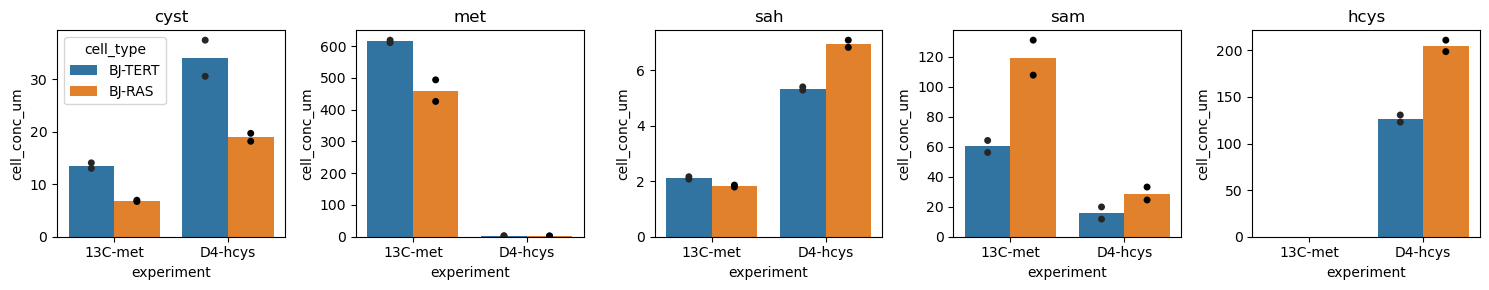

In [61]:
fig, axs = plt.subplots(ncols=len(measured_metabolites), figsize=(15,3))
# bar chart with error bars
for i, metabolite in enumerate(measured_metabolites):
    sns.barplot(
        cell_concentration_all\
            .xs(metabolite, level='metabolite')\
            .sort_index(ascending=[True, False]),
        x='experiment', y='cell_conc_um', hue='cell_type',
        errorbar=None,
        ax=axs[i], legend=(i==0)
    )
    axs[i].set_title(metabolite)
# add individual points
for i, metabolite in enumerate(measured_metabolites):
    sns.stripplot(
        cell_concentration_all\
            .xs(metabolite, level='metabolite')\
            .sort_index(ascending=[True, False]),
        x='experiment', y='cell_conc_um', hue='cell_type',
        dodge=True, jitter=False, palette='dark:k',
        ax=axs[i], legend=False
    )
    axs[i].set_title(metabolite)
fig.tight_layout()
plt.savefig(Path('plots') / 'cell_concentrations.pdf')

SAM / SAH ratio

In [63]:
sam_sah_ratio = (
    cell_concentration_all.xs('sam', level='metabolite')[['cell_conc']] /
    cell_concentration_all.xs('sah', level='metabolite')[['cell_conc']]).rename(columns={'cell_conc': 'sam_sah_ratio'})
sam_sah_ratio

sam_sah_ratio
experiment cell_type replicate_nr               
13C-met    BJ-RAS    1                 6.016E+01
                     2                 7.038E+01
           BJ-TERT   1                 3.089E+01
                     2                 2.597E+01
D4-hcys    BJ-RAS    1                 3.456E+00
                     2                 4.853E+00
           BJ-TERT   1                 3.675E+00
                     2                 2.224E+00

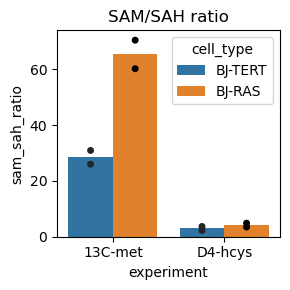

In [65]:
fig, axs = plt.subplots(ncols=1, figsize=(3,3))
sns.barplot(
    sam_sah_ratio.sort_index(ascending=[True, False]),
    x='experiment', y='sam_sah_ratio', hue='cell_type',
    errorbar=None,
)
sns.stripplot(
    sam_sah_ratio.sort_index(ascending=[True, False]),
    x='experiment', y='sam_sah_ratio', hue='cell_type',
    dodge=True, jitter=False, palette='dark:k',
    ax=axs, legend=False
)
axs.set_title('SAM/SAH ratio')
fig.tight_layout()
plt.savefig(Path('plots') / 'sam_sah_ratio.pdf')

## Estimate uptake / release

In [154]:
def normalize_to_incubated(concentrations: pd.DataFrame) -> pd.DataFrame:
    est_conc = concentrations['est_conc_m']
    uptake_release = concentrations\
        .assign(diff_m = (est_conc - est_conc.xs('none', level='cell_type').mean()))
    return uptake_release[uptake_release.index.get_level_values('cell_type') != 'none']

In [155]:
medium_volume = 2e-3

### Methionine tracing

In [214]:
met_release = met_conc_estimation.xs('Medium', level='matrix')\
    .groupby(level='metabolite', group_keys=False)\
    .apply(normalize_to_incubated)
# release in mol per h, whole culure
met_release['release_mol_h'] = met_release['diff_m'] * medium_volume / 24
# in units of  pmol / h / uL cells 
met_release['release_pmol_h_uLcells'] = (met_release['release_mol_h'] * 1e12)\
    .divide(cell_dilution['total_cell_volume'] * 1e6)
met_release

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
hcys       BJ-RAS    1            8.988E-01 1.228E-01   1.000E-05   1.582E-06   
                     2            8.688E-01 1.227E-01   1.000E-05   1.644E-06   
           BJ-TERT   2            7.965E-01 1.174E-01   1.000E-05   1.729E-06   
met        BJ-RAS    1            9.361E-01 4.876E-01   1.000E-04   1.087E-04   
                     2            9.357E-01 4.907E-01   1.000E-04   1.103E-04   
           BJ-TERT   2            9.370E-01 5.149E-01   1.000E-04   1.220E-04   

                                      diff_m  release_mol_h  \
metabolite cell_type replicate_nr                             
hcys       BJ-RAS    1             1.236E-06      1.030E-10   
                     2             1.298E-06      1.081E-10   
           BJ-TERT   2             1.383E-06      1.153E-10   
met        BJ-RAS    1            -9.557E-06     -7.965E-10   
                     2            -7.997E-06     -6.664E-10   
           BJ-TERT   2             3.708E-06      3.090E-10   

                                   release_pmol_h_uLcells  
metabolite cell_type replicate_nr                          
hcys       BJ-RAS    1                          1.291E+02  
                     2                          1.356E+02  
           BJ-TERT   2                          1.494E+02  
met        BJ-RAS    1                         -9.986E+02  
                     2                         -8.356E+02  
           BJ-TERT   2                          4.005E+02

In [217]:
# mean and std.dev, in pmol
met_release_avg = met_release\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'release_pmol_h_uLcells': ['mean','std']})
met_release_avg

release_pmol_h_uLcells          
                                       mean       std
metabolite cell_type                                 
hcys       BJ-RAS                 1.323E+02 4.564E+00
           BJ-TERT                1.494E+02       NaN
met        BJ-RAS                -9.171E+02 1.153E+02
           BJ-TERT                4.005E+02       NaN

In [219]:
met_release_avg.to_csv(results_path / '13C-met_release_flux.csv')

### Homocysteine tracing

In [220]:
hcys_release = hcys_conc_estimation.xs('Medium', level='matrix')\
    .groupby(level='metabolite', group_keys=False)\
    .apply(normalize_to_incubated)
# release in mol per h, whole culure
hcys_release['release_mol_h'] = hcys_release['diff_m'] * medium_volume / 24
# in units of  pmol / h / uL cells 
hcys_release['release_pmol_h_uLcells'] = (hcys_release['release_mol_h'] * 1e12)\
    .divide(cell_dilution['total_cell_volume'] * 1e6)
hcys_release

sample       mix  std_conc_m  est_conc_m  \
metabolite cell_type replicate_nr                                               
hcys       BJ-RAS    1            9.910E-01 7.927E-01   5.000E-05   1.999E-04   
                     2            9.915E-01 7.927E-01   5.000E-05   1.993E-04   
           BJ-TERT   1            9.896E-01 8.028E-01   5.000E-05   2.149E-04   
                     2            9.907E-01 7.810E-01   5.000E-05   1.862E-04   
met        BJ-RAS    1            6.997E-01 1.316E-02   1.250E-05   2.395E-07   
                     2            7.144E-01 1.276E-02   1.250E-05   2.273E-07   
           BJ-TERT   1            5.840E-01 1.854E-02   1.250E-05   4.097E-07   
                     2            5.660E-01 1.299E-02   1.250E-05   2.936E-07   

                                      diff_m  release_mol_h  \
metabolite cell_type replicate_nr                             
hcys       BJ-RAS    1            -2.561E-05     -2.134E-09   
                     2            -2.614E-05     -2.178E-09   
           BJ-TERT   1            -1.054E-05     -8.780E-10   
                     2            -3.922E-05     -3.269E-09   
met        BJ-RAS    1             4.062E-08      3.385E-12   
                     2             2.837E-08      2.364E-12   
           BJ-TERT   1             2.108E-07      1.757E-11   
                     2             9.471E-08      7.892E-12   

                                   release_pmol_h_uLcells  
metabolite cell_type replicate_nr                          
hcys       BJ-RAS    1                         -2.675E+03  
                     2                         -2.731E+03  
           BJ-TERT   1                         -1.138E+03  
                     2                         -4.237E+03  
met        BJ-RAS    1                          4.245E+00  
                     2                          2.965E+00  
           BJ-TERT   1                          2.277E+01  
                     2                          1.023E+01

In [221]:
# mean and std.dev, 
hcys_release_avg = hcys_release\
    .groupby(['metabolite', 'cell_type'])\
    .agg({'release_pmol_h_uLcells': ['mean','std']})
hcys_release_avg

release_pmol_h_uLcells          
                                       mean       std
metabolite cell_type                                 
hcys       BJ-RAS                -2.703E+03 3.920E+01
           BJ-TERT               -2.688E+03 2.191E+03
met        BJ-RAS                 3.605E+00 9.051E-01
           BJ-TERT                1.650E+01 8.868E+00

In [222]:
hcys_release_avg.to_csv(results_path / 'D4_hcys_release_flux.csv')